##Twitter Sentiment Analysis of "Sushant Singh Rajput"

In [ ]:
#Import the libraries
import tweepy #to extract tweets from twitter
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd #for working with dataframes
import numpy as np #linear algerbra
import re #Regular Expression- to clean our tweets
import matplotlib.pyplot as plt #data visualization
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Twitter_login.csv to Twitter_login.csv


In [ ]:
log= pd.read_csv("Twitter_login.csv")
log.head()

In [ ]:
#Twitter API Credentials
consumer_key= log["Key"][0]
consumer_key_secret= log["Key"][1]
access_token= log["Key"][2]
access_token_secret= log["Key"][3]

In [ ]:
#Create Authentication object
authenticate= tweepy.OAuthHandler(consumer_key, consumer_key_secret)
#Set access token and access token secret
authenticate.set_access_token(access_token,access_token_secret)
#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
#Extract 100 tweets from a User Timeline
posts= api.user_timeline(screen_name= "itsSSR", count= 100, lang = 'en', tweet_mode="extended")
posts

There is a lot of information available about every different tweet.
We will focus only on "Full Text"
Lets see the last five tweets from his account!

In [ ]:
i = 1
for tweet in posts[0:5]:
  print(str(i) + ") " + tweet.full_text + '/n')
  i= i +1

1) Right from exploring the local tourist attractions to experiencing the culture from a closer lens, it was just perfect! And what made it better was to get upto 5% cashback every-time I swiped my @mastercardindia @icicibank
#TravelWithMastercard #StartSomethingPriceless https://t.co/YO3z865A5a/n
2) "Best wishes to all the retail employees for bringing a smile on customer's faces" @SonataWatches @TRRAINindia/n
3) Men have emotions too so don't be shy to cry.  It's okay to let it out and not hold it inside. It's not a weakness but a sign of strength. Be man enough to feel. Feeling is human
@GilletteIndia #ManEnough #ShavingStereotypes #BestAManCanBe https://t.co/0bYc2hgvXq/n
4) RT @Tarunmansukhani: Partners in crime and style! #Drive coming to your #Netflix screens TOMORROW!😎💃

@karanjohar @apoorvamehta18 @itsSSR @…/n
5) Thank you so much @HTBrunch for making one of my most cherished dreams come true. ❤️
And a happy happy Diwali to everyone. 🙏🏻❤️🔱🍻💐✨
#keepdreaming 💥 https://t.co/OarzjE

So, This information is in set and we need to extract the full_text column from it and make a dataframe for easy analysis.

In [ ]:
df= pd.DataFrame([tweets.full_text for tweets in posts], columns= ["Tweets"])
df.head()

,Tweets
0,Right from exploring the local tourist attract...
1,"""Best wishes to all the retail employees for b..."
2,Men have emotions too so don't be shy to cry. ...
3,RT @Tarunmansukhani: Partners in crime and sty...
4,Thank you so much @HTBrunch for making one of ...


Noww, These tweets need text cleaning. Since they contain lots of hashtags, tags, emoticons, etc. It is where our re python module will come in handy!

In [ ]:
#Create function to clean tweets
def cleantxt(text):
  text= re.sub(r"@[A-Za-z0-9]+", "", text) #Remove Mentions
  text= re.sub(r"#", "", text) #Remove # 
  text = text.encode('ascii', 'ignore').decode('ascii') #remove emoticons
  text= re.sub(r"RT[\s]", "", text) #Remove RT
  text= re.sub(r"https?://\\ + [A-Za-z0-9] +  " , "", text) #Remove weblinks 
  return text

df["Tweets"]= df["Tweets"].apply(cleantxt)
df.head()
  



,Tweets,Plrty,Sbjecty,Polarity,Subjectivity
0,Right from exploring the local tourist attract...,0.446429,0.508929,0.446429,0.508929
1,"""Best wishes to all the retail employees for b...",0.650000,0.200000,0.650000,0.200000
2,Men have emotions too so don't be shy to cry. ...,0.000000,0.400000,0.000000,0.400000
3,: Partners in crime and style! Drive coming to...,0.000000,0.000000,0.000000,0.000000
4,Thank you so much for making one of my most c...,0.530000,0.670000,0.530000,0.670000


In [ ]:
review_sample= df.Tweets.iloc[3]
review_sample

': Partners in crime and style! Drive coming to your Netflix screens TOMORROW!\n\n   @'

Now, Our data is pretty much cleaned. Lets look at Subjectivity and Polarity of our Tweets.

In [ ]:
def get_Subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def get_Polarity(text):
  return TextBlob(text).sentiment.polarity


df["Polarity"]= df["Tweets"].apply(get_Polarity)
df["Subjectivity"]= df.Tweets.apply(get_Subjectivity)
df


,Tweets,Plrty,Sbjecty,Polarity,Subjectivity
0,Right from exploring the local tourist attract...,0.446429,0.508929,0.446429,0.508929
1,"""Best wishes to all the retail employees for b...",0.650000,0.200000,0.650000,0.200000
2,Men have emotions too so don't be shy to cry. ...,0.000000,0.400000,0.000000,0.400000
3,: Partners in crime and style! Drive coming to...,0.000000,0.000000,0.000000,0.000000
4,Thank you so much for making one of my most c...,0.530000,0.670000,0.530000,0.670000
...,...,...,...,...,...
95,"Our eyes blinked in mutual agreement, much bef...",-0.133333,0.733333,-0.133333,0.733333
96,I got up this morning and looked at myself thr...,0.000000,0.000000,0.000000,0.000000
97,Thank you for being so kind and I assure you t...,0.600000,0.900000,0.600000,0.900000
98,Often the difference between what is miserable...,-0.200000,0.950000,-0.200000,0.950000


Great! Now, We know how much negative or positive each tweet on his account and their subjectivity.

Curious, How WordCloud would look! Lets create it.


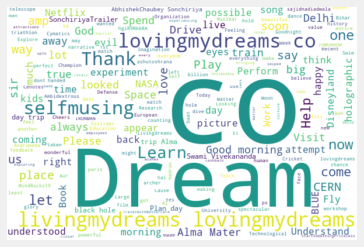

In [ ]:
#First we need to collect all our tweets in a single string

String = " ".join(x for x in df.Tweets)
word_cloud = WordCloud(width= 600, height= 400, max_font_size= 200, background_color = "white").generate(String)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
def get_analysis(score):
  if score > 0:
    return "positive"
  elif score < 0:
      return "negative"
  else: 
      return 'neutral'
df["Analysis"] = df.Polarity.apply(get_analysis)
df

,Tweets,Plrty,Sbjecty,Polarity,Subjectivity,Analysis
0,Right from exploring the local tourist attract...,0.446429,0.508929,0.446429,0.508929,positive
1,"""Best wishes to all the retail employees for b...",0.650000,0.200000,0.650000,0.200000,positive
2,Men have emotions too so don't be shy to cry. ...,0.000000,0.400000,0.000000,0.400000,neutral
3,: Partners in crime and style! Drive coming to...,0.000000,0.000000,0.000000,0.000000,neutral
4,Thank you so much for making one of my most c...,0.530000,0.670000,0.530000,0.670000,positive
...,...,...,...,...,...,...
95,"Our eyes blinked in mutual agreement, much bef...",-0.133333,0.733333,-0.133333,0.733333,negative
96,I got up this morning and looked at myself thr...,0.000000,0.000000,0.000000,0.000000,neutral
97,Thank you for being so kind and I assure you t...,0.600000,0.900000,0.600000,0.900000,positive
98,Often the difference between what is miserable...,-0.200000,0.950000,-0.200000,0.950000,negative


Okay. Noww, Lets visualize the sentiments of tweets using a scatter plot

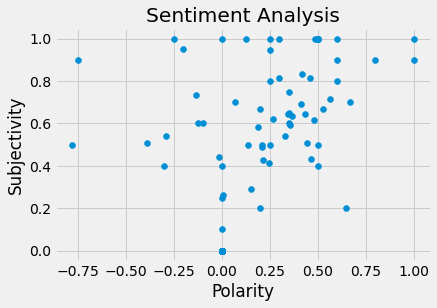

In [ ]:
plt.scatter(df.Polarity, df.Subjectivity)
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

               

Woah, Seems most of the tweets were positive. Only a few were negative. Lets look at the top negative tweets now!

In [ ]:
j=1
for i in range(0, df.shape[0]):
  if df.Analysis[i]=="negative":
    print( j , ") " ,df.Tweets[i])
    j= j+1 
  

1 )  The West says,we minimise evil by conquering it.
India says, We destroy evil by suffering, until evil is nothing but positive enjoyment.
The Goal is the same, however opposite it may appear. 
As we wend our way through this mazy vale of life, let us bid each other Godspeed. t.co/Hc26XKk7mp
2 )  Lets please come together in any way possible to support our Bihar to get her out of this unfortunate predicament. May God be with us. 
Heres the Bihar chief minister's donation fund link Ive found that we could use. Jai Hind  
t.co/0oO2BKd9R9 t.co/5cX850jzn7
3 )  : Drive racing to Netflix soon &amp; Makhna coming to drive you crazy, sooner! Song out tomorrow at 12pm.
 
4 )  : This is NASA's new visualization of a black hole.  The space agency says that it illustrates "how its gravity distorts our view
5 )  : Space is hard. We commend s attempt to land their Chandrayaan2 mission on the Moons South Pole. You have inspired us with
6 )        Arey Sexaaa! Mere dost!
Wohi Chhichhorapanti chalu 

In [ ]:
DFSorted= df.sort_values(by = "Polarity",ascending= True)
DFSorted.head(11)

,Tweets,Plrty,Sbjecty,Polarity,Subjectivity,Analysis
69,Arey Sexaaa! Mere dost!\nWohi Chhichhora...,-0.781250,0.500000,-0.781250,0.500000,negative
33,: Drive racing to Netflix soon &amp; Makhna co...,-0.750000,0.900000,-0.750000,0.900000,negative
23,"The West says,we minimise evil by conquering i...",-0.387216,0.505682,-0.387216,0.505682,negative
90,"Dream 33/150\nCreate non-zero sum, darwinian, ...",-0.300000,0.400000,-0.300000,0.400000,negative
60,: Space is hard. We commend s attempt to land ...,-0.291667,0.541667,-0.291667,0.541667,negative
32,Lets please come together in any way possible ...,-0.250000,1.000000,-0.250000,1.000000,negative
98,Often the difference between what is miserable...,-0.200000,0.950000,-0.200000,0.950000,negative
95,"Our eyes blinked in mutual agreement, much bef...",-0.133333,0.733333,-0.133333,0.733333,negative
76,An artists attempt to interact with the unkno...,-0.125000,0.600000,-0.125000,0.600000,negative
88,Acquired meanings that are not emergent of cel...,-0.100000,0.600000,-0.100000,0.600000,negative


So, This was our Twitter Sentiment Analysis for Sushant singh rajput.
Only 11% tweets were negative.